# EXERCICES: PENSER DE MANIERE PROBABILISTE 
                    par rodrigue MAHI

# objectifs

### Dans le premier exercice, l'objectifs est de construire un graphique de la fonction de répartition d'une variable.Le second exercice est un problème de simulation dans le but d'estimer une probabilité.

Vous répondez aux différentes questions en écrivant les codes adéquats et en faisant les commentaires lorsque cela est nécessaire.

# IMPORTATION DES OUTILS

In [42]:
# Code optionnel
from warnings import filterwarnings
filterwarnings("ignore")
#Librairies

import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt


Exercice 1:

L'ensemble des données utilisées dans cet exercie est un tableau d'échantillon donnant les mesures(le poids en gramme,la longueur en centimètres, le rapport en pourcentage de la hauteur à la longueur,etc.)de ces 7 espèces de poissons codées de 1 à 7.Chaque ligne représente un poisson individuelle.Ces données proviennent de [Journal of Statistic Education]("https://jse.amstat.org/datasets/"). Consulter la [description]("https://jse.amstat.org/datasets/fishcatch.txt") que vous pouvez télécharger via cette [page]("http://jse.amstat.org/datasets/fishcatch.dat.txt").

In [12]:
# Importation des données
url= "http://jse.amstat.org/datasets/fishcatch.dat.txt"

columns=["Species", "Weight","Lenght1", "Lenght2","Lenght3", "Height%", "Width%", "Sex"]


fishes=pd.read_csv(url, delimiter="\s+", header=None, names=columns)
fishes.head()

,Species,Weight,Lenght1,Lenght2,Lenght3,Height%,Width%,Sex
1,1,242.0,23.2,25.4,30.0,38.4,13.4,NaN
2,1,290.0,24.0,26.3,31.2,40.0,13.8,NaN
3,1,340.0,23.9,26.5,31.1,39.8,15.1,NaN
4,1,363.0,26.3,29.0,33.5,38.0,13.3,NaN
5,1,430.0,26.5,29.0,34.0,36.6,15.1,NaN


In [13]:
fishes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 1 to 159
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    int64  
 1   Weight   158 non-null    float64
 2   Lenght1  159 non-null    float64
 3   Lenght2  159 non-null    float64
 4   Lenght3  159 non-null    float64
 5   Height%  159 non-null    float64
 6   Width%   159 non-null    float64
 7   Sex      72 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 11.2 KB


Chaque ligne représente un poisson

In [ ]:
3  Weight      Weight of the fish (in grams)
4  Length1     Length from the nose to the beginning of the tail (in cm)
5  Length2     Length from the nose to the notch of the tail (in cm)
6  Length3     Length from the nose to the end of the tail (in cm)
7  Height%     Maximal height as % of Length3
8  Width%      Maximal width as % of Length3
9  Sex         1 = male 0 = female


In [15]:
fishes.Species.unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [16]:
fishes.Species.nunique()

7

In [14]:
# Fréquence  des différentes espèces de poisson
fishes.Species.value_counts(normalize=True)

7    0.352201
1    0.220126
3    0.125786
6    0.106918
5    0.088050
4    0.069182
2    0.037736
Name: Species, dtype: float64

par exemple, ici on a 35% des observations qui appartiennent à l'objet 7, donc l'espèce de poisson numéro 7.

##### Vous devez analyser le poids de l'espèce de poisson numéro 1, 3 et  7.Pour ce faire, on vous demande de tracer dans un  même graphique, la fonction de répartition empirique de ces 3 espèces.Que pouvez-vous en conclure sur cette distribution?

In [30]:
# Définissez une fonction de calcul de la répartition empirique d'une variable
def fre(data):
    x=np.sort(data)
    y=np.arange(1, len(x) +1) / len(x)
    
    return x, y

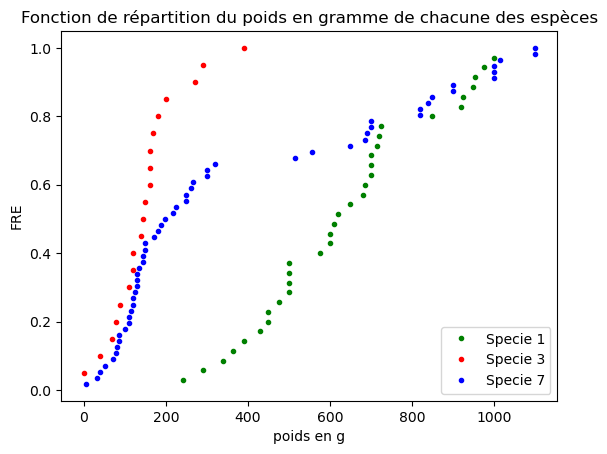

In [39]:
# Tracez une fonction de la répartition empirique du poids de chacune des espèces de poisson 1,3,7

x_1, y_1= fre(fishes[fishes.Species== 1]["Weight"])

x_3, y_3= fre(fishes[fishes.Species== 3]["Weight"])

x_7, y_7= fre(fishes[fishes.Species== 7]["Weight"])


plt.plot(x_1, y_1, color="green", marker=".", linestyle="none")

plt.plot(x_3, y_3, color="red", marker=".", linestyle="none")

plt.plot(x_7, y_7, color="blue", marker=".", linestyle="none")


plt.legend(("Specie 1",  "Specie 3",  "Specie 7"))
plt.xlabel("poids en g")
plt.ylabel("FRE") # "FRE": c'est la répartition empirique

plt.title("Fonction de répartition du poids en gramme de chacune des espèces")
plt.show();



commentez la distribution du poids de chaque espèce

### Specie 1: La fonction de répartition du poids de l'espèce 1 varie entre 200 et 1000 g
### Specie 3: La fonction de répartition du poids de l'espèce 3 varie entre 0 et 400 g ou encore est inférieur à 400g
### Specie 7: La fonction de répartition du poids de l'espèce 7 est supérieur à 1000 g




## A présent vous devez tracer la fonction de densité de probabilité de chaque espèce et vérifier si elle suit une loi normale.

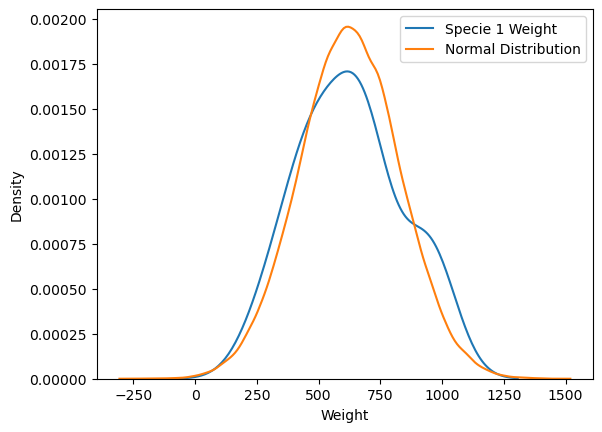

In [43]:
# La distribution du poids des poissons de l'espèce 1 est-elle normale?

mean=np.mean(fishes[fishes.Species== 1]["Weight"])
std=np.std(fishes[fishes.Species== 1]["Weight"])
samples_norm=np.random.normal(mean, std, size=100000)

sns.distplot(fishes[fishes.Species== 1]["Weight"], hist=False, label="Specie 1 Weight")
sns.distplot(samples_norm, hist=False, label="Normal Distribution")

plt.legend()
plt.show()

La distribution de l'espèce 1 des poids du poisson ne suivent pas la loi normale(ellen'estpas supperposée àla loi normale).Mais n'est pas asymétrique.

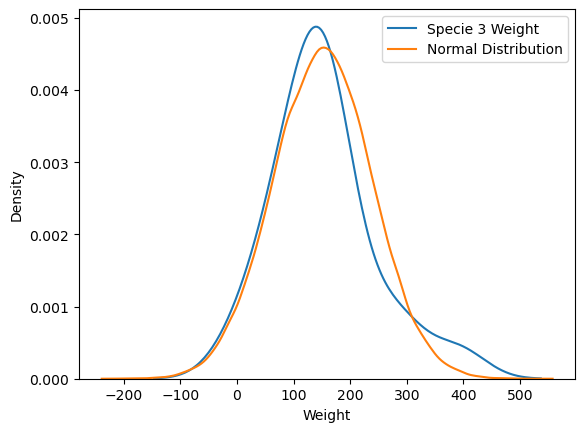

In [44]:
# La distribution du poids des poissons de l'espèce 3 est-elle normale?

mean=np.mean(fishes[fishes.Species== 3]["Weight"])

std=np.std(fishes[fishes.Species== 3]["Weight"])

samples_norm=np.random.normal(mean, std, size=100000)

sns.distplot(fishes[fishes.Species== 3]["Weight"], hist=False, label="Specie 3 Weight")

sns.distplot(samples_norm, hist=False, label="Normal Distribution")

plt.legend()
plt.show()

Elle se supperpose mais ce n'est pas toujours parfait.On a affaire à des distributions pseudo-normales.

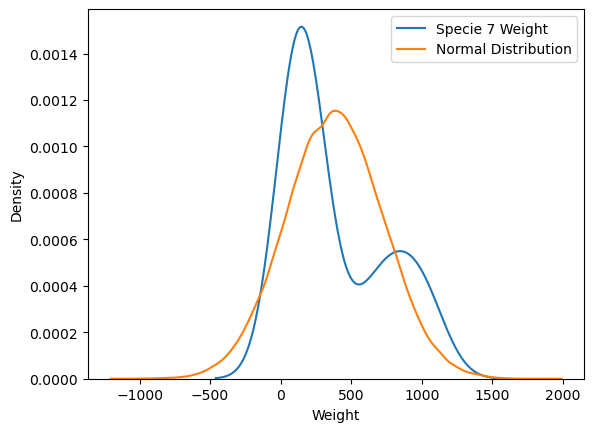

In [45]:
# La distribution du poids des poissons de l'espèce 7 est-elle normale?

mean=np.mean(fishes[fishes.Species== 7]["Weight"])

std=np.std(fishes[fishes.Species== 7]["Weight"])

samples_norm=np.random.normal(mean, std, size=100000)

sns.distplot(fishes[fishes.Species== 7]["Weight"], hist=False, label="Specie 7 Weight")

sns.distplot(samples_norm, hist=False, label="Normal Distribution")

plt.legend()
plt.show()

Ici on est très loin d'une loin normale,par rapport au deux premiers.L'espècenuméro a une distribution de poids qui n'est pas normale beaucoup plus par rapport aux autres.

# EXERCICE 2
On dispose d'une urne contenant 07 boules blanches et 06 boules noires.On tire successivement et sans remise 04 boules et on considère et on considèrecomme succès l'évènement:la première et la troisième boule sont blanches et la deuxième et la quatrième sont noires.

Faites une simulation de 100000 tirages et calculez la probabilité de succès.

In [49]:
# Simulation de tirages de boules dans une urne

n_success=0 # Initialisation du nombre de succès

N= 100000 # Nombres de simulation à réaliser

urne=["b","b","b","b","b","b","b", "n","n","n","n","n","n"]   # b: blanche, n: noire

for _ in range(N):
    tirage=np.random.choice(urne, replace=False, size=4)
    
    if ((tirage[0]=="b" and tirage[2]=="b") and (tirage[1]=="n" and tirage[3]=="n" )):
        n_success= n_success+1  # n_success précédemment initialisé va augmenter de 1
        
prob_success= n_success / N
    
print("La probabilité de succès est estimée à :",prob_success*100, "%")    

La probabilité de succès est estimée à : 7.409000000000001 %
